# **EE-613: Machine Learning for Engineers**
 
**Kernels Lab**<br>
Dr. Jean-Marc Odobez and Dr. Michael Villamizar<br>
Idiap Research Institute<br>
2019


# Part 1: Kernels

This notebook describes the use of kernels and the study of the hyperparameters. This notebook consists of 7 exercises with questions that you can complete and answer in the student report file (./report.doc). 

In [2]:
# Import libraries.
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Own libraries.
sys.path.append('../lib/')
import utils as utils
import test_exercises as tests
import synthetic_dataset_2d as synth

## 1. Higher-Dimensional Feature Spaces
In this first part, we will illustrate the advantages of using higher-dimensional feature spaces. This is going to be illustrated for the task of classifying 2D samples (points) belonging to two different classes.


### **1.1 2D Synthetic Dataset**
To illustrate the problem, we use synthetic datasets. The code that follows loads a synthetic dataset containing points in a 2D feature space (axis denoted $x_1$, $x_2$). There are two datasets called 'scenarios': the scenario 1 corresponds to a dataset with two linearly separable classes while the second scenario has two classes as well, but the data are not linearly separable. The datasets in both scenarios have (by default) 100 samples per class.

Let us first load the dataset scenario 1 which has two clusters.

In [3]:
# Parameters.
scenario = 1  # Dataset scenario.

# Load 2D synthetic dataset. 
dataset = synth.load_dataset(scenario)
X = dataset['samples'] # Dataset samples (2D points).
y = dataset['labels'] # Samples labels (class index).

# Message.
print ('2D Synthetic Dataset:')
print ('+ Num. samples: {}'.format(X.shape[0]))
print ('+ Num. dimensions: {}'.format(X.shape[1]))
print ('+ Data format:', X.shape)
print ('+ Labels format:', y.shape)

2D Synthetic Dataset:
+ Num. samples: 200
+ Num. dimensions: 2
+ Data format: (200, 2)
+ Labels format: (200,)


Run the next cell to visualize the dataset samples (2D points). We see that both classes are linearly separable, indicated by the black line. 

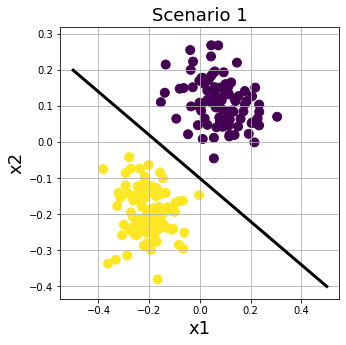

In [4]:
# Show samples.
def show_samples(X, y, title='2D Samples'):
    """This function shows the dataset samples X. """
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0],X[:,1],c=y, s=80)
    plt.xlabel('x1', fontsize=18)
    plt.ylabel('x2', fontsize=18)
    plt.title(title, fontsize=18)
    plt.grid(True)
    return ax
    
# Show dataset samples (2D points).
ax = show_samples(X, y, 'Scenario 1');

# Show line separating both classes.
ax.plot([-0.5, 0.5], [0.2,-0.4], 'k-', lw=3);

The next cell loads the synthetic dataset for the scenario 2 which has five clusters belonging to two classes. Note  that the classes are not separable -linearly-.


In [5]:
# Parameters.
scenario = 2 # Dataset scenario.

# Load 2D synthetic dataset. 
dataset = synth.load_dataset(scenario)
X = dataset['samples'] # Dataset samples (2D points).
y = dataset['labels']  # Samples labels (class index).

# Message.
print ('2D Synthetic Dataset:')
print ('+ Num. samples: {}'.format(X.shape[0]))
print ('+ Num. dimensions: {}'.format(X.shape[1]))
print ('+ Data format:', X.shape)
print ('+ Labels format:', y.shape)

2D Synthetic Dataset:
+ Num. samples: 200
+ Num. dimensions: 2
+ Data format: (200, 2)
+ Labels format: (200,)


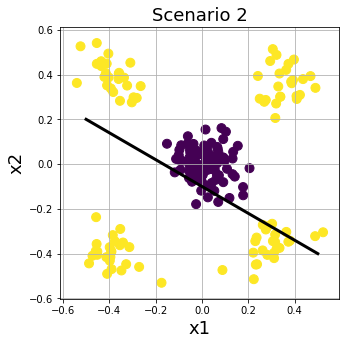

In [6]:
# Show dataset samples.
ax = show_samples(X, y, 'Scenario 2');

# Show that the classes are not linearly separable.
ax.plot([-0.5, 0.5], [0.2,-0.4], 'k-', lw=3);

### **1.2 Adding features**
In order to separate both classes we add a third feature which is a combination of $x1$ and $x2$. This is done in the next cell using the function $\phi$ which transforms the original data ($X$) into new data ($Z$) containing points in a 3D feature space ($z1$,$z2$,$z3$).

<font color="blue" size="+0">**Exercise 1: Adding features**</font>

Complete the next function Z = function_phi (X) such that for each row $x=(x_1,x_2)$ of $X$, we create a row $z=(z_1, z_2, z_2)=\phi(x)$ in $Z$ defined by $z_1=x_1$, $z_2=x_2$, $z_3 = z_1^2 + z_2^2$. 
Insert the implemented function (*TODO* block only) in the <span style="color:red">**student report**</span> file.


In [7]:
# Transformation phi.
def function_phi(X):
    """This function adds a new feature to the input data (2D samples).
    
    Input:
        + X (Numpy ndarray): Nx2 array containing the samples (2D points),
            being N the number of samples.
    Output:
        + Z (Numpy ndarray): Nx3 array with the transformed samples (3D points).
    """
        
    # Number of samples.
    N = X.shape[0]
    
    # Original features x1 and x2.
    x1 = X[:,0].reshape(N,1) # x1.
    x2 = X[:,1].reshape(N,1) # x2.
    
    #=========================================
    # TODO: Complete the next line to create
    # the new feature x3 combining x1 and x2.
    z1 = x1
    z2 = x2
    z3 = pow(z1,2) + pow(z2,2)
    #=========================================
        
    # New dataset.
    Z = np.concatenate([z1, z2, z3], axis=1)
    
    # Check format.
    assert Z.shape[1]==3
    
    return Z  

#### **Test your exercise**
Run the next cell to test your code.

In [9]:
# Check implementation.
tests.test_phi(function_phi)  

Checking implementation
>> Running test 1 ...  ok
>> Running test 2 ...  ok
The exercise is correct. Well done !!!


Use the function_phi function to convert the original data ($X$) into new data ($Z$).

In [10]:
# Transform dataset from 2D to 3D.
Z = function_phi(X)

# Messages.
print ('3D Synthetic Dataset:')
print ('+ Num. samples: {}'.format(Z.shape[0]))
print ('+ Num. dimensions: {}'.format(Z.shape[1]))
print ('+ Data format:', Z.shape)
print ('+ Labels format:', y.shape)

3D Synthetic Dataset:
+ Num. samples: 200
+ Num. dimensions: 3
+ Data format: (200, 3)
+ Labels format: (200,)


Run the next cell to visualize the transformed dataset in the 3D feature space. Observe that it is now linearly separable (e.g. along the axis $z_3$).


**Q1 [bonus]**: could you think of  any other feature $z_3$ combining $z1$ and $z2$ that would linearly separate both classes?

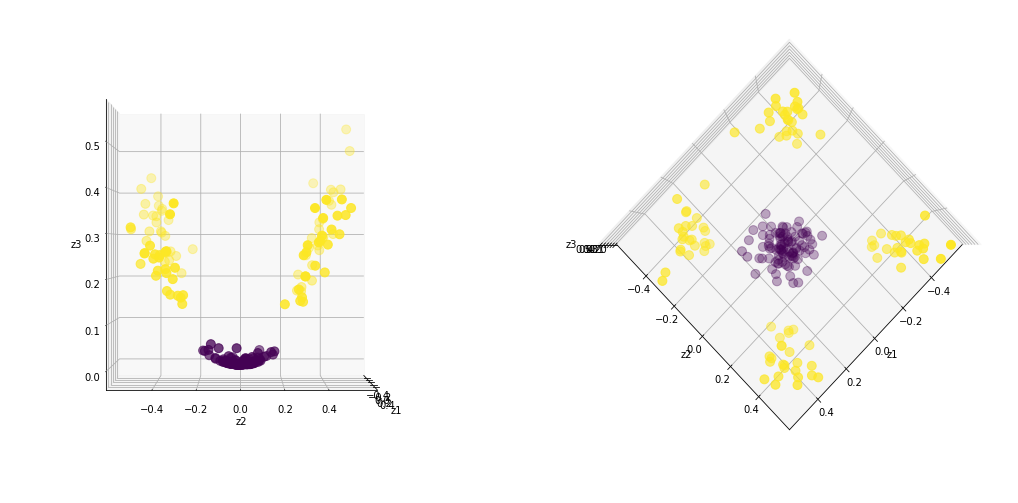

In [11]:
# Show dataset samples in 3D.
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=y, s=80)
ax.view_init(0, 0)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=y, s=80)
ax.view_init(90, 45)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')
plt.show()

## **2. Kernels**

To do classification, we are in general interested in comparing datapoints, and to measure their similarity or dissimilarity. Remember that the dot/inner product $\cdot$ is a measure of dissimilarity (dot product is 0 for orthogonal vectors). Also, the dot product can be used to define linear classifiers, by defining a class separation as $a x + b = 0$. 

Thus, to compare two datapoints $x_a$ and $x_b$, we could compute their dot product as $x_a \cdot x_b$. Note that if we assume that $x_a$ and $x_b$ are represented by row vectors, then their dot product can be computed in matrix form as $x_a x_b^T$. With an abuse of notation, we will often represent such a matrix product as $x_a \cdot x_b^T$ to emphasize that this corresponds to an inner product of two vectors.

However, as we have seen above, it is easier in general to (linearly) separate data points when they lie in a higher-dimensional space. Hence, to compare two datapoints, we could first project them in a higher dimensional space using a function $\phi$, and compare their outputs with the dot product. This is what kernel functions are doing by definition.   

### **2.1 Kernel Function**
The kernel function $k(x_a, x_b)$ between two feature vectors $x_a$ and $x_b$ associated to a projection function $\phi$ is by definition:

$k(x_a, x_b) = \phi(x_a) \cdot  \phi(x_b)^T$

Note that in this notebook, the initial feature vectors $x$ correspond to 2D vectors (points): $x = [x_{1}, x_{2}]$, but in general they can be of any dimension.

<font color="blue" size="+0">**Exercise 2: Kernel function**</font>

Complete the next function which computes the kernel function between two data points. Insert the implemented function (*TODO* block only) in the <span style="color:red">**student report**</span> file.

***Hint:*** You can use the Numpy **np.dot()** function. Also, note that the function w.item() extract the scalar value of a 1x1 array w.

In [16]:
# Kernel function.
def kernel(xa, xb, phi):
    """ This function defines the kernel function for 
        xa and xb using the transformation phi.
        
    Input:
        + xa (Numpy ndarray): 1x2 array for the feature vector xa.
        + xb (Numpy ndarray): 1x2 array for the feature vector xb.
        + phi (func): Transformation phi.
    Output:
        + k (float): Kernel output k(xa,xb).
    """
    
    # Check format (1x2 arrays for xa and xb).
    assert xa.shape[0]==1 and xa.shape[1]==2
    assert xb.shape[0]==1 and xb.shape[1]==2
        
    #==============================================
    # TODO: Complete the next line to
    # implement the kernel function.
    k = np.dot(phi(xa),phi(xb).T)
    k = k.item() # Get scalar value from 1x1 array
    #===============================================
   
    return k

#### **Test your exercise**
Run the next cell to test your exercise

In [18]:
# Check implementation.
tests.test_kernel(kernel) 

Checking implementation 
Run test 1 ...  ok
Run test 2 ...  ok
The exercise is correct. Well done !!!


### **2.2 Polynomial Kernel**

We will now look at several kernel functions, starting with the polynomial kernel.

The transformation below $\phi_{poly}$ has to implement the second order polynomial kernel, which transforms the 2D points into 3D points as:

$\phi_{poly}(x) = [x_1^2, \sqrt 2 x_1 x_2, x_2^2]$

<font color="blue" size="+0">**Exercise 3: Polynomial kernel**</font>

Complete the next function to define the function $\phi_{poly}$. Insert the implemented function (*TODO* block only) in the <span style="color:red">**student report**</span> file.

In [19]:
# Polynomial transformation.
def phi_poly(x):
    """ This function transforms the input 2D feature vector (x)
        into a 3D vector (z) using a polynomial of degree of two.
        
    Input:
        + x (Numpy ndarray): 1x2 feature vector.
    Output:
        + xt (Numpy ndarray): 1x3 feature vector.
    """
    
    # Check format.
    assert x.shape[0]==1 and x.shape[1]==2
    
    # Features. 
    x1 = x[0,0]  # x1.
    x2 = x[0,1]  # x2.
    
    #===============================================
    # TODO: complete the next line to transform the 
    # 2D fector vector (x) into a 3D feature vector (z)
    z = np.array([[ pow(x1,2), np.sqrt(2)*x1*x2, pow(x2,2)]])
    #===============================================
    
    # Check format.
    assert z.shape[0]==1 and z.shape[1]==3
    
    return z

#### **Test your exercise**
Run the next cell to test your exercise

In [20]:
# Check implementation.
tests.test_phi_poly(phi_poly) 

Checking implementation
Run test 1 ... ok
Run test 2 ... ok
The exercise is correct. Well done !!!


Once the previous functions are defined, run the next cell to compute the kernel for $xa$ and $xb$.

In [21]:
# Parameters.
xa = np.array([[1, 2]])  # Feature vector xa.
xb = np.array([[10, -3]])  # Feature vector xb.

# Polynomial kernel.
k = kernel(xa, xb, phi_poly)

# Message.
print ('k(xa, xb) = {0:.3f}'.format(k))

k(xa, xb) = 16.000


#### **The kernel trick**

Above, the polynomial kernel $k(x_a,x_b)$ was computed by first projecting in a higher dimensional space the feature vectors $xa$ and $xb$, using the transformation $\phi_{poly}$, and then computing the dot product between them. However, if we are only interested in directly computing dot products between pairs of data points $x_a$ and $x_b$ without looking at their individual projection (in high dimension), we can do it as well. For the polynomial kernel, this can be done by computing:

$k(x_a,x_b) = (x_a \cdot x_b^T + c)^p$

where $p$ is the polynomial order (or degree) and $c$ is a constant. Note that this way of specifying the kernel (without explicitly defining $\phi$) is known as the *kernel trick*. 

<font color="blue" size="+0">**Exercise 4: Polynomial kernel**</font>

Complete the next function to implement the polynomial kernel $k(xa, xb)$. Insert the implemented function (*TODO* block only) in the <span style="color:red">**student report**</span> file.


In [24]:
# Polynomial kernel.
def kernel_poly(xa, xb, p=2, c=0):
    """ This function defines the polynomial kernel 
        with order p and constant c.
    
    Input:
        + xa (Numpy ndarray): 1x2 array for the feature vector xa.
        + xb (Numpy ndarray): 1x3 array for the feature vector xb.
        + p (int): Polynomial degree (Default: 2).
        + c (int): Constant (Default: 0).
    Output:
        + k (float): Kernel output k(xa, xb).
    """
    
    # Check format.
    assert xa.shape[0]==1 and xa.shape[1]==2
    assert xb.shape[0]==1 and xb.shape[1]==2
        
    #================================================
    # TODO: Complete the next line to implement the
    # polynomial kernel with order two.
    k = pow(np.dot(xa,xb.T) + c,p)
    k = k.item() # Get scalar from 1x1 array.
    #================================================
    
    return k

#### **Test your exercise**
Run the next cell to test your exercise

In [25]:
# Check implementation.
tests.test_kernel_poly(kernel_poly) 

Checking implementation
Run test 1 ... ok
Run test 2 ... ok
The exercise is correct. Well done !!!


<font color="blue" size="+0">**Exercise 5: Comparison**</font>

You can note that for the $\phi$ function defined earlier, if we take the polynomial kernel of order 2 with the constant c being equal to 0, we obtain the same output for the values xa and xb used above.

In [26]:
# Parameters.
xa = np.array([[1, 2]])  # Feature vector xa.
xb = np.array([[10, -3]])  # Feature vector xb.

# Polynomial kernel.
k = kernel_poly(xa, xb, p=2, c=0)

# Message.
print ('k(xa, xb) = {0:.3f}'.format(k))

k(xa, xb) = 16.000


To verify that this is actually the case for all values of  $xa$ and $xb$, set different features vectors $xa$ and $xb$ and compare the results of the polynomial kernel implementations.

**Q1**: What are the kernel values ($k1$ and $k2$) for the $xa$ and $xb$ below? <br>
**Q2**: Thinking about the computational cost, and the generalization to higher order polynomials, explain which implementation is more recommended and why.

Insert the answers to the questions in the <span style="color:red">**student report**</span> file.

In [28]:
# Parameters.
xa = np.array([[10, 0.02]])  # Vector xa.
xb = np.array([[1.0, 3]])  # Vector xb.

# Polynomial kernel using transformation phi.
k1 = kernel(xa, xb, phi_poly)

# Polynomial kernel w/o transformation phi 
# (kernel trick).
k2 = kernel_poly(xa, xb, p=2, c=0)

# Messages.
print ('Polynomial kernel:')
print ('+ k1(xa,xb) = {0:.3f}'.format(k1))
print ('+ k2(xa,xb) = {0:.3f}'.format(k2))

Polynomial kernel:
+ k1(xa,xb) = 101.204
+ k2(xa,xb) = 101.204


### **2.3 Radial Basis Function Kernel (RBF)**

Another popular kernel function is Radial Basis Function (RBF) based on Gaussian function. This is defined as:

$k(x_a, x_b) = exp(-\gamma \|x_a-x_b\|^2)$

In the above, $\gamma$ > 0 corresponds to $1/2\sigma^2$.

<font color="blue" size="+0">**Exercise 6: RBF kernel**</font>

Complete the next function to implement the RBF kernel $k(x_a, x_b)$. Insert the implemented function (*TODO* block only) in the <span style="color:red">**student report**</span> file.

In [37]:
# RBF kernel.
def kernel_rbf(xa, xb, gamma=1):
    """ This function defines the RBF kernel for the input 
        feature vectors xa and xb.
        
    Input:
        + xa (Numpy ndarray): 1x2 array for the feature vector xa.
        + xb (Numpy ndarray): 1x3 array for the feature vector xb.
        + gamma (float): Gamma parameter.
    Output:
        + k (float): Kernel output k(xa, xb).
    """
    # Check format.
    assert xa.shape[0]==1 and xa.shape[1]==2
    assert xb.shape[0]==1 and xb.shape[1]==2
   
    #=================================================
    # TODO: Complete the next line to define the RBF
    # kernel for xa and xb.
    xd = xa - xb
    k = np.exp(-gamma*np.dot(xd, xd.T))
    k = k.item()
    #=================================================
    
    return k

#### **Test your exercise**
Run the next cell to test your exercise

In [38]:
# Check implementation.
tests.test_kernel_rbf(kernel_rbf)

Checking implementation
Run test 1 ... ok
Run test 2 ... ok
The exercise is correct. Well done !!!


Run the next cell to calculate the RBF kernel for $xa$ and $xb$.

In [39]:
# Parameters.
xa = np.array([[0.1, 0.2]])  # Vector xa.
xb = np.array([[1.0, 0.3]])  # Vector xb.
gamma1 = 1.0  # Gamma.

# RBF kernel.
k = kernel_rbf(xa, xb, gamma=gamma1)

# Messsage.
print ('k(xa, xb) = {0:.3f}'.format(k))

k(xa, xb) = 0.440


### **2.4 Similarity maps**

A way to visualize (in low dimensions) the defined kernel is to look at kernel similarity maps. Indeed, the kernel can be interpreted as a similarity function (but it does not have to be). This allows to observe the impact of different kernel parameters. In the following, we do this for the RBF kernel. t 

<font color="blue" size="+1">**Exercise 7: RBF similarity maps**</font>

The next cell has the code to compute the similarity between two features vectors ($xa$ and $xb$) using the RBF kernel.The vector $xa$ is an input parameter (reference) while $xb$ is taking different values within a grid. The code computes and displays a kernel similarity map between $xa$ and $xb$. High values are indicated by yellow whereas low values are shown in blue.

**Q1**: Run the next cell with different values of $\gamma$ (eg. 1, 3, 5, 10, 20, 50). Describe what is the impact of $\gamma$ on the resulting kernel map.<br>
**Q2**: What are the minimum and maximum kernel output values? <br>
**Q3**: Use the polynomial kernel with degree 2 or degree 3 instead of the RBF kernel. Looking at the resulting map, which points are more 'similar' to xa? Explain the results from the polynomial definition.  Does this kernel behave as a similarity metric (in this original space)?  

Insert the answers to the questions in the <span style="color:red">**student report**</span> file.

Similarity map:
+ Min. value: 0.000
+ Max. value: 1.000
+ Max. vector: [0.25,0.25]


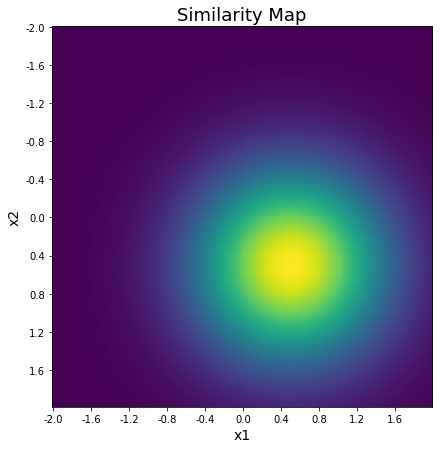

In [22]:
# Parameters.
xa = np.array([[0.5, 0.5]])  # Reference feature vector.
gamma = 1.0  # Gamma kernel parameter.

# 2D feature space [-2.0, 2.0].
x1 = np.arange(-2.0, 2.0, 0.02)
x2 = np.arange(-2.0, 2.0, 0.02)
dm = len(x1)

# Allocate kernel output map.
kmap = np.zeros((dm,dm))

# Compute kernel function for every pair (xa, xb).
for cu, u in enumerate(x1):
    for cv, v in enumerate(x2):
        xb = np.array([[u, v]])
        k = kernel_rbf(xa, xb, gamma=gamma)
        #k = kernel_poly(xa, xb, p=2,c=0)
        kmap[cv,cu] = k
        
# Max. kernel value position.
tmp = np.where(kmap==np.max(kmap))
mx1 = (2*tmp[1]/dm - 1.0).item()
mx2 = (2*tmp[0]/dm - 1.0).item()

# Message.
print ('Similarity map:')
print ('+ Min. value: {0:.3f}'.format(np.min(kmap)))
print ('+ Max. value: {0:.3f}'.format(np.max(kmap)))
print ('+ Max. vector: [{0:.2f},{1:.2f}]'.format(mx1, mx2))
    
# Show map.
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
plt.imshow(kmap)
plt.title('Similarity Map', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
ax.set_xticks(np.arange(0,dm,20))
ax.set_yticks(np.arange(0,dm,20))
ax.set_xticklabels(['{:.1f}'.format(x) for x in x1[::20]]) 
ax.set_yticklabels(['{:.1f}'.format(x) for x in x2[::20]]) 
plt.show()